In [1]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold

# Logistic Regression: Regularization

In [2]:
data = pd.read_csv('../../data/microchip_tests.txt', header=None, names=('test1', 'test2', 'released'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [3]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [15]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values
X.shape

(118, 2)

In [9]:
X[y==1, 0][:4]

array([ 0.051267, -0.092742, -0.21371 , -0.375   ])

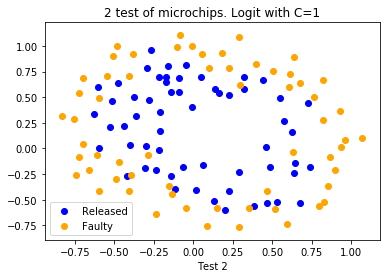

In [13]:
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Released')
plt.scatter(X[y==0, 0], X[y==0, 1], c='orange', label='Faulty')
plt.xlabel('Test 1')
plt.xlabel('Test 2')
plt.title('2 test of microchips. Logit with C=1')
plt.legend();

In [16]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))


    # to every point from [x_min, m_max]x[y_min, y_max]
    # we put in correspondence its own color
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [14]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 36)

Accuracy on training set: 0.627


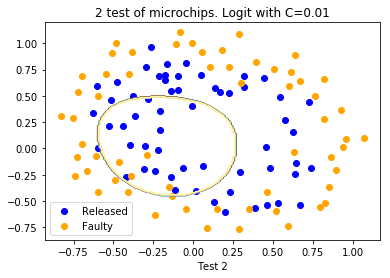

In [19]:
C = 1e-2
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.01, poly_featurizer=poly)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Released')
plt.scatter(X[y==0, 0], X[y==0, 1], c='orange', label='Faulty')
plt.xlabel('Test 1')
plt.xlabel('Test 2')
plt.title('2 test of microchips. Logit with C=%s' % C)
plt.legend();

print('Accuracy on training set:', round(logit.score(X_poly, y), 3))

Accuracy on training set: 0.831


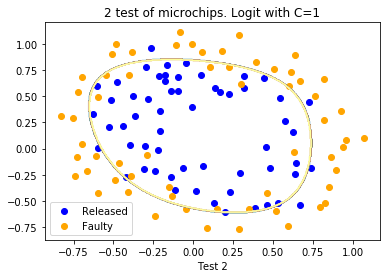

In [22]:
C = 1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Released')
plt.scatter(X[y==0, 0], X[y==0, 1], c='orange', label='Faulty')
plt.xlabel('Test 1')
plt.xlabel('Test 2')
plt.title('2 test of microchips. Logit with C=%s' % C)
plt.legend();

print('Accuracy on training set:', round(logit.score(X_poly, y), 3))

Accuracy on training set: 0.873


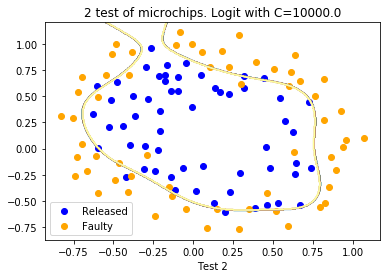

In [23]:
C = 1e4
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Released')
plt.scatter(X[y==0, 0], X[y==0, 1], c='orange', label='Faulty')
plt.xlabel('Test 1')
plt.xlabel('Test 2')
plt.title('2 test of microchips. Logit with C=%s' % C)
plt.legend();

print('Accuracy on training set:', round(logit.score(X_poly, y), 3))

In [24]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, n_jobs=-1, verbose=1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
/Users/shakarim/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=array([1.00000e-02, 1.02334e-02, ..., 9.77192e+02, 1.00000e+03]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=1)

In [26]:
logit_searcher.C_

array([198.8827857])

In [31]:
logit_searcher.scores_[1].shape

(5, 500)

Text(0, 0.5, 'Mean CV-accuracy')

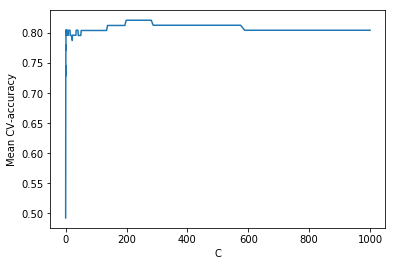

In [32]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')

(0, 10)

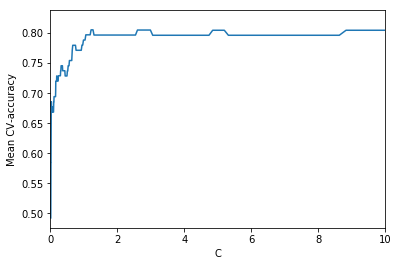

In [35]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')
plt.xlim((0,10))

# Logistic Regression: Pros and Cons

In [36]:
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
from io import BytesIO
import requests
import tarfile

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

def load_imdb_dataset(extract_path="../../../mlcourse_data", overwrite=False):
    #check if existed already
    if os.path.isfile(os.path.join(extract_path, "aclImdb", "README")) and not overwrite:
        print("IMDB dataset is already in place.")
        return
    
    print("Downloading the dataset from:  ", url)
    response = requests.get(url)
    
    tar = tarfile.open(mode= "r:gz", fileobj = BytesIO(response.content))
    
    data = tar.extractall(extract_path)
    
load_imdb_dataset()

In [38]:
path_to_IMDB = '../../../mlcourse_data/aclImdb'

reviews_train = load_files(os.path.join(path_to_IMDB, 'train'),
                          categories=['pos', 'neg'])
text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files(os.path.join(path_to_IMDB, 'test'),
                          categories=['pos', 'neg'])
text_test, y_test = reviews_test.data, reviews_test.target

In [40]:
print('Number of documents in the traininig data: {}'.format(len(text_train)))
print(np.bincount(y_train))
print('Number of documents in the test data: {}'.format(len(text_train)))
print(np.bincount(y_test))

Number of documents in the traininig data: 25000
[12500 12500]
Number of documents in the test data: 25000
[12500 12500]


### Bag of words

In [44]:
cv = CountVectorizer()
cv.fit(text_train)


TypeError: object of type 'NoneType' has no len()

In [45]:
len(cv.vocabulary_)

74849

In [47]:
print(cv.get_feature_names()[50000:50005])

['pincher', 'pinchers', 'pinches', 'pinching', 'pinchot']


In [48]:
X_train = cv.transform(text_train)

In [49]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [51]:
print(text_train[19726])

b'This movie is terrible but it has some good effects.'


In [50]:
X_train[19726].nonzero()[1]

array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150,
       66562], dtype=int32)

In [53]:
X_test = cv.transform(text_test)

### Train Logistic Regression

In [54]:
%%time
logit = LogisticRegression(solver='lbfgs', random_state=17, n_jobs=-1)
logit.fit(X_train, y_train)

CPU times: user 140 ms, sys: 140 ms, total: 279 ms
Wall time: 3.22 s


In [55]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3)

(0.981, 0.864)

In [56]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [57]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    plt.legend();

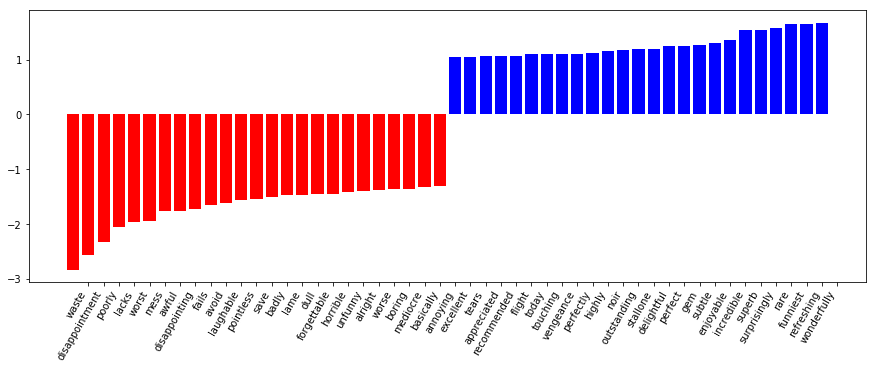

In [58]:
visualize_coefficients(logit, cv.get_feature_names())

In [59]:
%%time
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(),
                                # for some reason n_jobs > 1 won't work 
                                # with GridSearchCV's n_jobs > 1
                                LogisticRegression(solver='lbfgs', 
                                                   n_jobs=-1,
                                                   random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

0.86408
CPU times: user 6.72 s, sys: 213 ms, total: 6.93 s
Wall time: 9.34 s


In [60]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, 
                          param_grid_logit, 
                          return_train_score=True, 
                          cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)

CPU times: user 5.93 s, sys: 809 ms, total: 6.74 s
Wall time: 43.2 s


In [71]:
grid_logit.best_params_, grid_logit.best_score_

({'logisticregression__C': 0.1}, 0.8848)

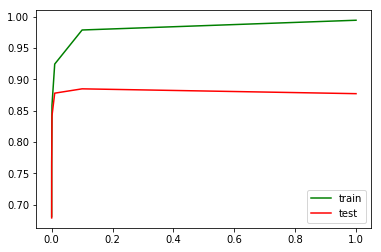

In [72]:
plot_grid_scores(grid_logit, 'logisticregression__C')


In [67]:
grid_logit.score(text_test, y_test)

0.87812

# Validation and Learning Curves

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import validation_curve, learning_curve

In [75]:
data = pd.read_csv('../../data/telecom_churn.csv').drop('State', axis=1)
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})

y = data['Churn'].astype('int').values
X = data.drop('Churn', axis=1).values

In [76]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss='log', n_jobs=-1, random_state=17, max_iter=5)
logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), 
                       ('sgd_logit', sgd_logit)])
val_train, val_test = validation_curve(logit_pipe, X, y,
                                       'sgd_logit__alpha', alphas, cv=5,
                                       scoring='roc_auc')

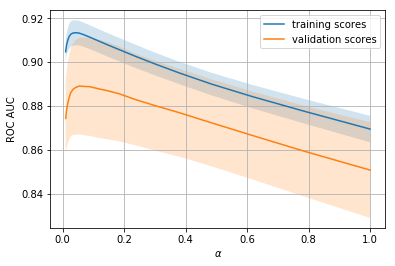

In [77]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel(r'$\alpha$'); plt.ylabel('ROC AUC')
plt.legend()
plt.grid(True);

In [78]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)), 
                           ('sgd_logit', SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha, max_iter=5))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
                                                  X, y, train_sizes=train_sizes, cv=5,
                                                  scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()
    plt.grid(True);

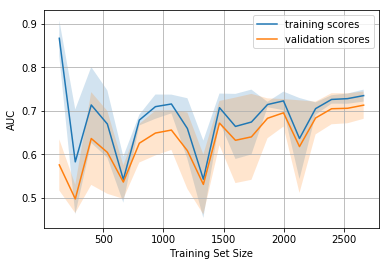

In [79]:
plot_learning_curve(degree=2, alpha=10)


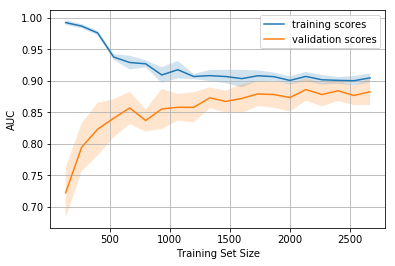

In [80]:
plot_learning_curve(degree=2, alpha=0.05)


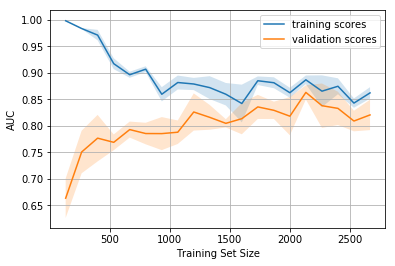

In [81]:
plot_learning_curve(degree=2, alpha=1e-4)
